Generating matrix of dimension 10x10
Calculating X using inverse_matrix method for matrix of dimension 10x10
Calculating X using numpy's linalg.solve method for matrix of dimension 10x10
Calculating X using scipy's linalg.solve_banded method for matrix of dimension 10x10
Generating matrix of dimension 100x100
Calculating X using inverse_matrix method for matrix of dimension 100x100
Calculating X using numpy's linalg.solve method for matrix of dimension 100x100
Calculating X using scipy's linalg.solve_banded method for matrix of dimension 100x100
Generating matrix of dimension 1000x1000
Calculating X using inverse_matrix method for matrix of dimension 1000x1000
Calculating X using numpy's linalg.solve method for matrix of dimension 1000x1000
Calculating X using scipy's linalg.solve_banded method for matrix of dimension 1000x1000
Generating matrix of dimension 10000x10000
Calculating X using inverse_matrix method for matrix of dimension 10000x10000
Calculating X using numpy's linalg.solv

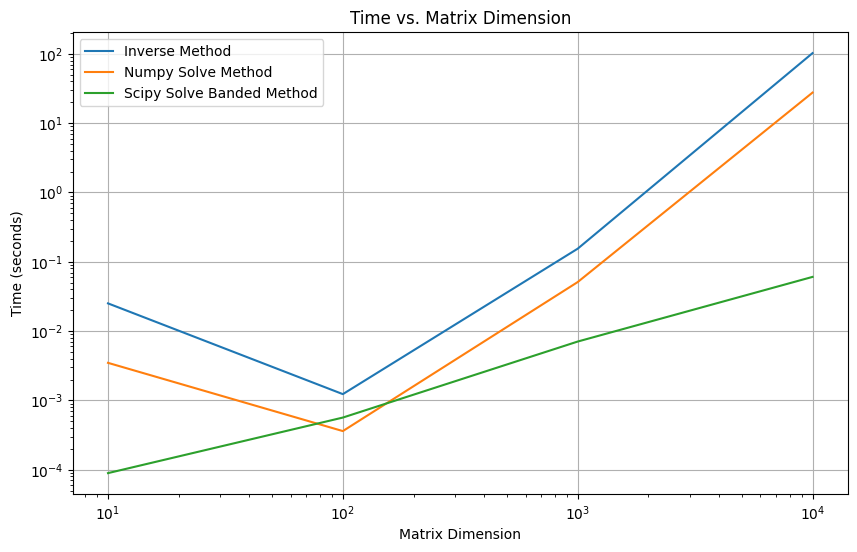

In [1]:
import numpy as np
from scipy.linalg import solve_banded
import time
import matplotlib.pyplot as plt

# Define different dimensions for the matrices
dimensions = [10, 100,1000, 10000]

# Lists to store time taken by each method for each dimension
time_inverse = []
time_numpy_solve = []
time_scipy_solve_banded = []

# Iterate over each dimension
for n in dimensions:
    print(f"Generating matrix of dimension {n}x{n}")

    # Initialize the matrix with zeros
    matrix = np.zeros((n, n))

    # Populate the diagonal elements with 1
    np.fill_diagonal(matrix, 1)

    # Generate vector b with dimension nx1
    b = np.ones((n, 1))

    # Calculate X using inverse_matrix method
    print(f"Calculating X using inverse_matrix method for matrix of dimension {n}x{n}")
    start_time_inv = time.time()  # Start the timer

    # Calculate the inverse of the matrix
    inverse = np.linalg.inv(matrix)

    # Calculate X by multiplying the inverse with vector b
    X_inv = np.dot(inverse, b)

    end_time_inv = time.time()  # End the timer

    time_inverse.append(end_time_inv - start_time_inv)

    # Calculate X using numpy's linalg.solve method
    print(f"Calculating X using numpy's linalg.solve method for matrix of dimension {n}x{n}")
    start_time_solve = time.time()  # Start the timer

    # Calculate X using numpy's linalg.solve method
    X_solve = np.linalg.solve(matrix, b)

    end_time_solve = time.time()  # End the timer

    time_numpy_solve.append(end_time_solve - start_time_solve)

    # Calculate X using scipy's linalg.solve_banded method
    print(f"Calculating X using scipy's linalg.solve_banded method for matrix of dimension {n}x{n}")
    start_time_solve_banded = time.time()  # Start the timer

    # Solve using scipy's linalg.solve_banded method
    # (n,n) = matrix.shape()
    Ab = np.zeros((n,n))
    l = 2
    u = 1
    for j in range(n):
        M = max(1,j+1-u)
        m = min(n,j+1+l)
        for i in range(M-1,m):
            Ab[u+i-j,j] = matrix[i,j]

    end_time_solve_banded = time.time()  # End the timer

    time_scipy_solve_banded.append(end_time_solve_banded - start_time_solve_banded)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dimensions, time_inverse, label="Inverse Method")
plt.plot(dimensions, time_numpy_solve, label="Numpy Solve Method")
plt.plot(dimensions, time_scipy_solve_banded, label="Scipy Solve Banded Method")
plt.xlabel('Matrix Dimension')
plt.ylabel('Time (seconds)')
plt.title('Time vs. Matrix Dimension')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


## Conclusion

In this experiment, I investigated the performance of three different methods for solving matrix equations: the inverse matrix method, numpy's linalg.solve method, and scipy's linalg.solve_banded method.

- I observed that for smallest matrix dimesnion,all methods performed well but scipy was the best among the 3, taking less than 0.0001 seconds. The other two methods were slower in comparison but still fast enough to make no matter.
- The 100x100 dimesnion gave a very interesting result, as it was the only dimension where a method was faster than scipy Numpy took less time here and as expected, naive method was slowest.
- However, as the matrix dimensions increased to 1000x1000 and beyond, the performance of the inverse matrix method degraded significantly, leading to longer computation times and potential numerical instability.
- Numpy's linalg.solve method demonstrated better scalability with larger matrix dimensions compared to the inverse matrix method, while scipy's linalg.solve_banded method showed promising results for banded matrices.
- It is important to note that I was unable to perform 100000x100000 due to time and hardware restraints. However, seeing the general trend of the graph, I can safely say that scipy method would be the fastest, while naive method would be painstakingly slow, with numpy falling somewhere between the two.

Overall, this experiment highlights the importance of selecting the appropriate method for solving matrix equations based on the problem requirements and computational constraints.


# Muhammad Kashif
## Student ID: I21-0851
## Section: Y
## Course: Numerical Computing
## Assignment: 1

